In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind



In [2]:
data = pd.read_csv("test_table.csv")
user= pd.read_csv("user_table.csv")

In [3]:
merged = data.merge(user , on = 'user_id')

In [4]:
control = merged[merged['test']== 0]
test = merged[merged['test'] == 1]

In [5]:
#to calculate mean
control['pages_visited'].mean()
test['pages_visited'].mean()
ttest,pval = ttest_ind(control['pages_visited'],test['pages_visited'])
print(pval)


0.5772149446386227


As the p value is greater than 0.05 so there is no significant difference between the control and test

In [6]:
def T_test(merged):
    con=merged.loc[merged['test']==0,'pages_visited']
    test=merged.loc[merged['test']==1,'pages_visited']
    con_mean = con.mean()
    test_mean = test.mean()
    con_std = con.std()
    test_std = test.std()
    ttest,pval = ttest_ind(con,test)
    return pd.Series([pval,con_mean,test_mean,con_std,test_std])
    

In [7]:
merged.groupby("browser").apply(T_test)


,0,1,2,3,4
browser,,,,,
Chrome,0.000913,4.613341,4.690680,2.699211,2.134154
Firefox,0.000597,4.600164,4.714259,2.726912,2.133455
IE,0.007781,4.598478,4.685985,2.723423,2.101626
Opera,0.000000,4.546438,0.000000,2.734467,0.000000
Safari,0.241212,4.638180,4.692336,2.658005,2.114771


For all the browsers other than Safari the difference is significant 


In [8]:
merged

,user_id,date,browser,test,pages_visited,signup_date
0,600597,2015-08-13,IE,0,2,2015-01-19
1,4410028,2015-08-26,Chrome,1,5,2015-05-11
2,6004777,2015-08-17,Chrome,0,8,2015-06-26
3,5990330,2015-08-27,Safari,0,8,2015-06-25
4,3622310,2015-08-07,Firefox,0,1,2015-04-17
...,...,...,...,...,...,...
99995,2698493,2015-08-21,Chrome,1,6,2015-03-21
99996,3396864,2015-08-04,Chrome,0,5,2015-04-10
99997,7507573,2015-08-06,IE,1,9,2015-08-06
99998,2316634,2015-08-17,IE,1,7,2015-03-10


In [9]:
merged['date'] = pd.to_datetime(merged['date'])
merged['signup_date'] = pd.to_datetime(merged['signup_date'])

In [10]:
cont_merge = merged[merged['test'] == 0]
test_merge = merged[merged['test'] == 1]


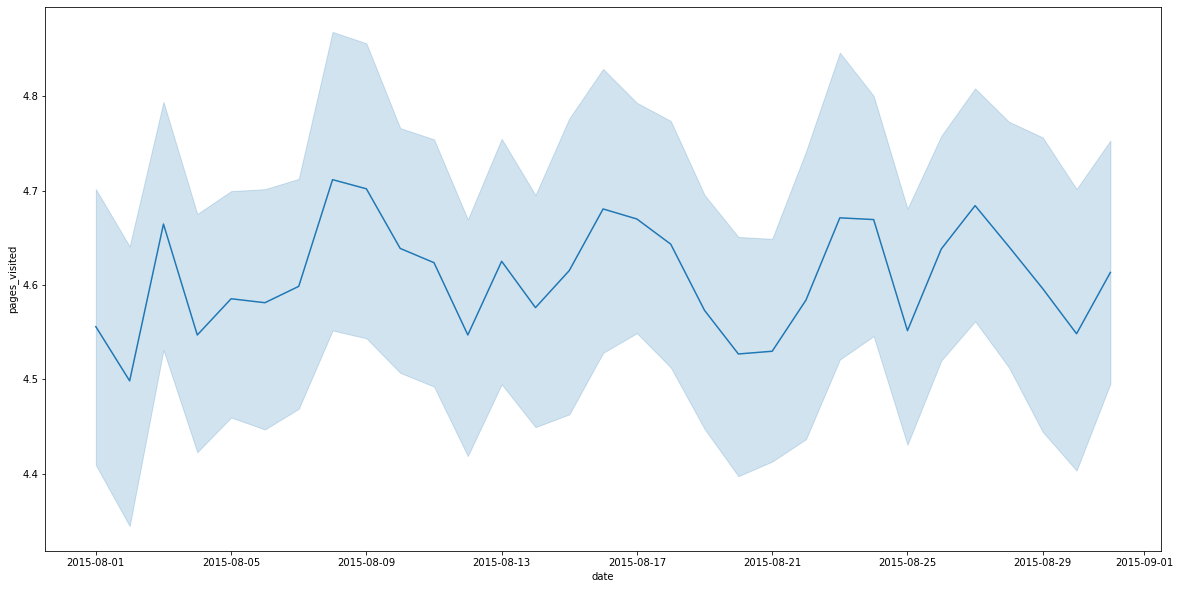

In [11]:
#to drawthe plot
plt.figure(figsize = [20,10])
sns.lineplot(x = cont_merge['date'],y = cont_merge['pages_visited'])
plt.savefig("control pages visited on dates")
plt.show()

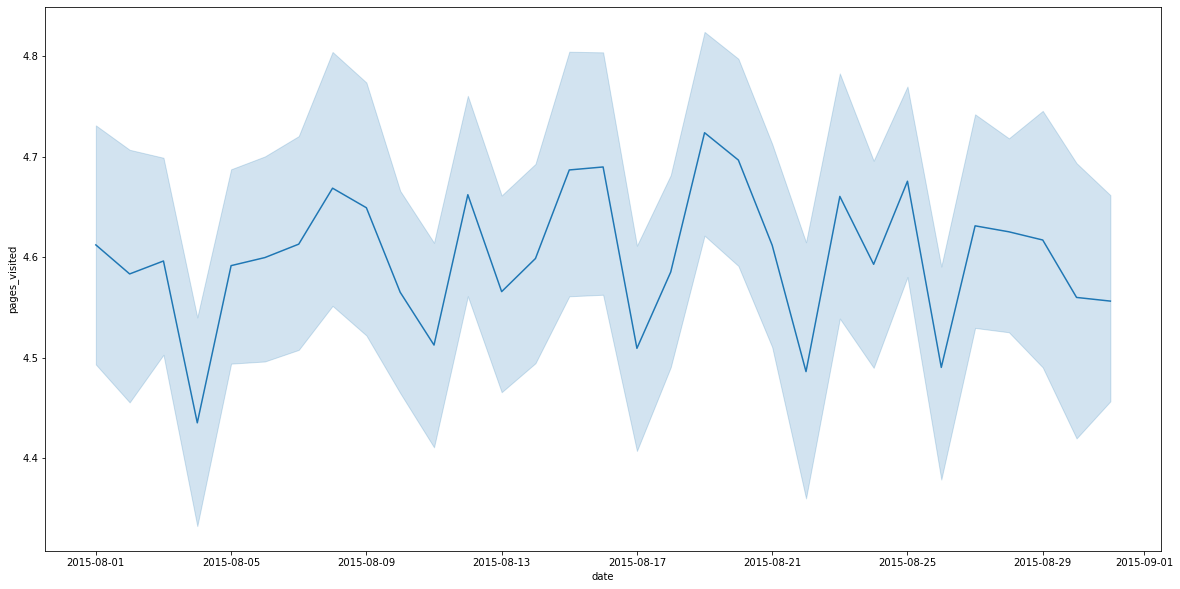

In [13]:
plt.figure(figsize = [20,10])
sns.lineplot(x = test_merge['date'],y = test_merge['pages_visited'])
plt.savefig("test dates page visited")
plt.show()